<a href="https://colab.research.google.com/github/mebirtukan/EyeMovementEventDetectionAlgorithms/blob/main/IDT_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import  TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score



In [ ]:
!wget www.kasprowski.pl/datasets/events.zip
!unzip events.zip > xxxy

--2022-10-29 14:29:28--  http://www.kasprowski.pl/datasets/events.zip
Resolving www.kasprowski.pl (www.kasprowski.pl)... 94.152.164.213
Connecting to www.kasprowski.pl (www.kasprowski.pl)|94.152.164.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2909538 (2.8M) [application/zip]
Saving to: ‘events.zip’

events.zip          100%[===================>]   2.77M  2.43MB/s    in 1.1s    

2022-10-29 14:29:30 (2.43 MB/s) - ‘events.zip’ saved [2909538/2909538]



In [ ]:

def openfile(filename):
  mat = loadmat(filename)
  mdata = mat['ETdata']
  mtype = mdata.dtype
  ndata = {n: mdata[n][0,0] for n in mtype.names}
  ndata

  data_headline = ndata['pos']
  print(data_headline)
  data_headline = data_headline[0]
  data_raw = ndata['pos']
  len(data_raw)
  pdata = pd.DataFrame(data_raw,columns=data_headline)
  df=pd.DataFrame(pdata)
  df=pd.DataFrame(pdata)
  df.dtypes
  df[1.0]=df[1.0].astype(int)
  df[1.0].dtypes
  x=pdata.iloc[:, 3:5].values
  y=pdata.iloc[:, 5].values
  x[0]
  x.shape[0]
  return x ,y

In [ ]:
## we don't use it here for now
def open_list_of_files(files_to_load):
  samples = []
  labels =[]
  for my_file in files_to_load:
    sam,lab = openfile(my_file)
    #ssam,slab = make_sequences(sam,lab,50)
    print('Number of samples so far:',len(samples))
    samples.extend(sam)
    labels.extend(lab)
  samples = np.array(samples)
  labels = np.array(labels)
  print('Number of samples at the end:',len(samples))
  return samples,labels
files_to_load = ['data/UH33_img_vy_labelled_MN.mat','data/UH47_img_Europe_labelled_RA.mat','data/UH21_img_Rome_labelled_MN.mat']
#files_to_load = ['data/TH34_img_Europe_labelled_MN.mat', 'data/UH21_img_Rome_labelled_RA.mat', 'data/UH47_img_Europe_labelled_MN.mat', 'data/UH27_img_vy_labelled_MN.mat']

#s,l = open_list_of_files(files_to_load)
x,y=open_list_of_files(files_to_load)
#print(x.shape)
#print(y.shape)
#print(s1.shape)
#print(l1.shape)

[[3.92137817e+09 2.30000000e+01 2.20000000e+01 5.13900500e+02
  4.03585700e+02 1.00000000e+00]
 [3.92138017e+09 2.30000000e+01 2.20000000e+01 5.14502200e+02
  4.03069100e+02 1.00000000e+00]
 [3.92138217e+09 2.30000000e+01 2.20000000e+01 5.14937900e+02
  4.03189600e+02 1.00000000e+00]
 ...
 [3.93135019e+09 2.50000000e+01 2.40000000e+01 5.53063700e+02
  5.37588400e+02 1.00000000e+00]
 [3.93135219e+09 2.50000000e+01 2.40000000e+01 5.53479800e+02
  5.37836700e+02 1.00000000e+00]
 [3.93135419e+09 2.50000000e+01 2.40000000e+01 5.52668200e+02
  5.37910200e+02 1.00000000e+00]]
Number of samples so far: 0
[[2.59371216e+09 2.10000000e+01 2.10000000e+01 5.04312800e+02
  3.94728500e+02 1.00000000e+00]
 [2.59371716e+09 2.10000000e+01 2.10000000e+01 5.04939200e+02
  3.94330800e+02 1.00000000e+00]
 [2.59372216e+09 2.10000000e+01 2.10000000e+01 5.05242100e+02
  3.93573200e+02 1.00000000e+00]
 ...
 [2.60368213e+09 2.40000000e+01 2.40000000e+01 7.46249600e+02
  3.18997200e+02 1.00000000e+00]
 [2.6036871

In [ ]:
#x,y=openfile('data/UH33_img_vy_labelled_MN.mat')

In [ ]:
# sequence 
def make_sequences(samples, labels, sequence_dim = 100, sequence_lag = 1, sequence_attributes = 2):
    nsamples = []
    nlabels = [] 
    for i in range(0,samples.shape[0]-sequence_dim,sequence_lag):
            nsample = np.zeros((sequence_dim,sequence_attributes))
            for j in range(i,i+sequence_dim):
                nsample[j-i,0] = samples[j,0]
                nsample[j-i,1] = samples[j,1]
            nlabel = labels[i+sequence_dim//2]
            nsamples.append(nsample)
            nlabels.append(nlabel)
        
    samples = np.array(nsamples)
    labels = np.array(nlabels)
    return samples,labels 

In [ ]:
sequence_dim = 2
print("Converting to sequences of length {}".format(sequence_dim))
X,Y = make_sequences(x, y, sequence_dim)
#x1,y1 = make_sequences(s1, l1, sequence_dim)
print("done:",X.shape )

Converting to sequences of length 2
done: (11971, 2, 2)


In [ ]:
#X = X.reshape(-1, sequence_dim*2)
x.shape

(11973, 2)

In [ ]:
type(X)


numpy.ndarray

In [ ]:
X[0][1]

array([514.5022, 403.0691])

In [ ]:
#calculate dsipersion for sequence of previous to next samples

In [ ]:
from scipy.spatial import distance
import csv
import numpy as np

def calcu_disp(data, disp_thres):
  Xs = data[:,[0]]
  Ys = data[:,[1]]

  
  disper = [] #x values difference
  #Y = [] #y values difference 
  #Dispersion=[]
  mvmts=[]

  for i in range(len(data) - 1):
    if i>=sequence_dim:
      disper.append(max((Xs[i-sequence_dim:i+sequence_dim])) - min((Xs[i-sequence_dim:i+sequence_dim]) )+(max(Ys[i-sequence_dim:i+sequence_dim]) - min(Ys[i-sequence_dim:i:i+sequence_dim]) ))
    else:
      disper.append(0)
    #Y.append(max(Ys[i:i+sequence_dim]) - min(Ys[i:i+sequence_dim]) )
  #Dispersion=(X+Y)
  #Dispersion=np.absolute(Dispersion)
  Dispersion=np.absolute(disper)
  print(Dispersion)
  print('Max Dipersion=', max(Dispersion))
  print('min disp=', min(Dispersion))

  for D in Dispersion:
    if(D<disp_thres):
      mvmts.append(1)
    else:
        mvmts.append(2)
  return mvmts
  #store 1 in mvmts[] if dispersion is less than threshold else store 2
  
y1=calcu_disp(x, disp_thres=0.1)
  

  




[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
#calculate dsipersion for sequence of current to next samples

In [ ]:
y_pred=np.array(y1)

In [ ]:
len(y_pred),

(11972,)

In [ ]:
thresholds=[0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7, 7.5, 8, 9, 10, 12,13, 14, 15, 16, 20, 22, 25, 30, 35, 50]


In [ ]:
#thresholds=[x/10 for x in range(0,50)]
#y=y[:-1]
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, precision_score, cohen_kappa_score, recall_score
fixation_recall=[]
fixation_precision=[]
fixation_f1_score=[]
saccade_recall=[]
saccade_precision=[]
saccade_f1_score=[]


for t in thresholds:
  y1=calcu_disp(x, disp_thres=t)
  y_pred=np.array(y1)
    #y_pred=np.array(y1)
  y_pred=(y_pred[:-1])
  #print(len(y_real))
 # print(len(y_pred))
  cm=confusion_matrix(y, y_pred)
  #print(cm)
  print(classification_report(y,y_pred))
  print('Kochen kappa for threshold', t, cohen_kappa_score(y, y_pred))
  #print(classification_report(y,y_pred['f1-score']))
  #Fixation accuracy calculation
  sumf=cm[0][0]+cm[0][1]
  Tc=cm[0][0]
  fixation_recall.append(Tc*100/sumf)
  print('Fixation recall at threshol',t, 'is', fixation_recall[-1])
  #fixation precision 
  sumfp=cm[0][0]+cm[1][0]
  Tcfp=cm[0][0]
  fixation_precision.append(Tcfp*100/sumfp)
  print('Fixation precission at threshold', t, 'is', fixation_precision[-1])
  #fixation f1_score
  multiple_recal_prec=2*((Tcfp*100/sumfp)*(Tc*100/sumf))
  add_recall_prec=((Tc*100/sumf)+Tcfp*100/sumfp)
  result_f1_score=multiple_recal_prec/add_recall_prec
  fixation_f1_score.append(result_f1_score)
  print('fixation_f1_score for threshold', t, 'is', fixation_f1_score[-1])
  #Saccade accuracy calculation
  sums=cm[1][0]+cm[1][1]
  Tcs=cm[1][1]
  saccade_recall.append(Tcs*100/sums)
  print('Saccade recall at threshol',t, 'is', saccade_recall[-1])
  #Saccade precison
  sum_saccP=cm[0][1]+cm[1][1]
  Tc_saccP=cm[1][1]
  saccade_precision.append(Tc_saccP*100/sum_saccP)
  print('saccade_precision for threshold', t, 'is', saccade_precision[-1])
  #saccade f1_score
  multiply=2*((Tc_saccP*100/sum_saccP)*(Tcs*100/sums))
  addition=(Tcs*100/sums)+(Tc_saccP*100/sum_saccP)
  saccade_f1_score.append(multiply/addition)
  print('saccade_f1_score for threshold', t, 'is', saccade_f1_score[-1])
  
  
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     10091
           2       0.10      1.00      0.18      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.10     11971
   macro avg       0.03      0.33      0.06     11971
weighted avg       0.01      0.10      0.02     11971

Kochen kappa for threshold 0 0.0
Fixation recall at threshol 0 is 0.0
Fixation precission at threshold 0 is nan
fixation_f1_score for threshold 0 is nan
Saccade recall at threshol 0 is 100.0
saccade_precision for threshold 0 is 10.596261185434571
saccade_f1_score for threshold 0 is 19.16206040214692


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.39      0.56     10091
           2       0.15      0.99      0.26      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.43     11971
   macro avg       0.38      0.46      0.27     11971
weighted avg       0.85      0.43      0.50     11971

Kochen kappa for threshold 1.0 0.12574331687579998
Fixation recall at threshol 1.0 is 38.9951441878902
Fixation precission at threshold 1.0 is 99.82242516489092
fixation_f1_score for threshold 1.0 is 56.08209221121642
Saccade recall at threshol 1.0 is 99.41471571906355
saccade_precision for threshold 1.0 is 16.18788291354663
saccade_f1_score for threshold 1.0 is 27.8421730476525


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.62      0.77     10091
           2       0.21      0.98      0.35      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.62     11971
   macro avg       0.40      0.54      0.37     11971
weighted avg       0.86      0.62      0.68     11971

Kochen kappa for threshold 1.5 0.2566121023256879
Fixation recall at threshol 1.5 is 62.33277177683084
Fixation precission at threshold 1.5 is 99.714648065948
fixation_f1_score for threshold 1.5 is 76.71199463381915
Saccade recall at threshol 1.5 is 98.49498327759197
saccade_precision for threshold 1.5 is 23.659369351275355
saccade_f1_score for threshold 1.5 is 38.153846153846146


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.78      0.87     10091
           2       0.29      0.98      0.45      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.75     11971
   macro avg       0.43      0.59      0.44     11971
weighted avg       0.86      0.75      0.78     11971

Kochen kappa for threshold 2.0 0.3956099629813057
Fixation recall at threshol 2.0 is 77.95064909325141
Fixation precission at threshold 2.0 is 99.63267891070298
fixation_f1_score for threshold 2.0 is 87.46803069053709
Saccade recall at threshol 2.0 is 97.5752508361204
saccade_precision for threshold 2.0 is 34.404481132075475
saccade_f1_score for threshold 2.0 is 50.871839581516994


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.99      0.87      0.92     10091
           2       0.37      0.96      0.54      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.83     11971
   macro avg       0.45      0.61      0.49     11971
weighted avg       0.87      0.83      0.83     11971

Kochen kappa for threshold 2.5 0.5057389100335046
Fixation recall at threshol 2.5 is 86.80011891784758
Fixation precission at threshold 2.5 is 99.50017039645576
fixation_f1_score for threshold 2.5 is 92.71726474012915
Saccade recall at threshol 2.5 is 96.32107023411372
saccade_precision for threshold 2.5 is 46.3768115942029
saccade_f1_score for threshold 2.5 is 62.60869565217392


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.98      0.92      0.95     10091
           2       0.45      0.95      0.61      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.87     11971
   macro avg       0.48      0.62      0.52     11971
weighted avg       0.87      0.87      0.86     11971

Kochen kappa for threshold 3.0 0.5839592043265782
Fixation recall at threshol 3.0 is 92.01268457040928
Fixation precission at threshold 3.0 is 99.3048128342246
fixation_f1_score for threshold 3.0 is 95.51977778920838
Saccade recall at threshol 3.0 is 94.56521739130434
saccade_precision for threshold 3.0 is 58.38926174496644
saccade_f1_score for threshold 3.0 is 72.19917012448133


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.98      0.95      0.96     10091
           2       0.51      0.93      0.66      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.89     11971
   macro avg       0.49      0.63      0.54     11971
weighted avg       0.87      0.89      0.88     11971

Kochen kappa for threshold 3.5 0.6262841793880973
Fixation recall at threshol 3.5 is 94.62887721732237
Fixation precission at threshold 3.5 is 99.11770811708533
fixation_f1_score for threshold 3.5 is 96.8212927756654
Saccade recall at threshol 3.5 is 92.89297658862876
saccade_precision for threshold 3.5 is 67.21113127646703
saccade_f1_score for threshold 3.5 is 77.99227799227799


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.97      0.96      0.97     10091
           2       0.55      0.91      0.69      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.90     11971
   macro avg       0.51      0.63      0.55     11971
weighted avg       0.87      0.90      0.88     11971

Kochen kappa for threshold 4.0 0.6532434110215095
Fixation recall at threshol 4.0 is 96.31354672480428
Fixation precission at threshold 4.0 is 98.94126030744172
fixation_f1_score for threshold 4.0 is 97.60972180375617
Saccade recall at threshol 4.0 is 91.30434782608695
saccade_precision for threshold 4.0 is 74.59016393442623
saccade_f1_score for threshold 4.0 is 82.10526315789474


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.97      0.97      0.97     10091
           2       0.59      0.90      0.72      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11971
   macro avg       0.52      0.62      0.56     11971
weighted avg       0.87      0.91      0.89     11971

Kochen kappa for threshold 4.5 0.6685991729383629
Fixation recall at threshol 4.5 is 97.39371717371915
Fixation precission at threshold 4.5 is 98.7837973665695
fixation_f1_score for threshold 4.5 is 98.08383233532935
Saccade recall at threshol 4.5 is 89.88294314381271
saccade_precision for threshold 4.5 is 80.34379671150971
saccade_f1_score for threshold 4.5 is 84.84609313338595


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     10091
           2       0.62      0.89      0.73      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11971
   macro avg       0.53      0.62      0.57     11971
weighted avg       0.87      0.91      0.89     11971

Kochen kappa for threshold 5.0 0.6746101160129796
Fixation recall at threshol 5.0 is 97.98830641165395
Fixation precission at threshold 5.0 is 98.64325618515562
fixation_f1_score for threshold 5.0 is 98.31469052945563
Saccade recall at threshol 5.0 is 88.62876254180603
saccade_precision for threshold 5.0 is 83.92715756136184
saccade_f1_score for threshold 5.0 is 86.21390809272062


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.96      0.98      0.97     10091
           2       0.65      0.87      0.74      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.54      0.62      0.57     11971
weighted avg       0.87      0.92      0.89     11971

Kochen kappa for threshold 5.5 0.6764817362161806
Fixation recall at threshol 5.5 is 98.4243385194728
Fixation precission at threshold 5.5 is 98.49266164220548
fixation_f1_score for threshold 5.5 is 98.45848822800495
Saccade recall at threshol 5.5 is 87.29096989966555
saccade_precision for threshold 5.5 is 86.78304239401496
saccade_f1_score for threshold 5.5 is 87.0362651104627


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     10091
           2       0.67      0.86      0.75      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.54      0.62      0.57     11971
weighted avg       0.87      0.92      0.89     11971

Kochen kappa for threshold 6.0 0.6766440961103846
Fixation recall at threshol 6.0 is 98.79100188286591
Fixation precission at threshold 6.0 is 98.32330604596115
fixation_f1_score for threshold 6.0 is 98.55659911023233
Saccade recall at threshol 6.0 is 85.78595317725753
saccade_precision for threshold 6.0 is 89.37282229965157
saccade_f1_score for threshold 6.0 is 87.54266211604096


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     10091
           2       0.70      0.85      0.77      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.55      0.61      0.58     11971
weighted avg       0.87      0.92      0.90     11971

Kochen kappa for threshold 6.5 0.6785970308026138
Fixation recall at threshol 6.5 is 99.16757506689129
Fixation precission at threshold 6.5 is 98.20412168792934
fixation_f1_score for threshold 6.5 is 98.68349686899069
Saccade recall at threshol 6.5 is 84.6989966555184
saccade_precision for threshold 6.5 is 92.34275296262534
saccade_f1_score for threshold 6.5 is 88.35586567815089


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.95      0.99      0.97     10091
           2       0.72      0.84      0.77      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.55      0.61      0.58     11971
weighted avg       0.87      0.92      0.89     11971

Kochen kappa for threshold 7 0.6757266435490752
Fixation recall at threshol 7 is 99.35586165890398
Fixation precission at threshold 7 is 98.07297270859826
fixation_f1_score for threshold 7 is 98.71024908929802
Saccade recall at threshol 7 is 83.52842809364549
saccade_precision for threshold 7 is 93.89097744360902
saccade_f1_score for threshold 7 is 88.40707964601769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.94      0.99      0.97     10091
           2       0.73      0.82      0.77      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.56      0.61      0.58     11971
weighted avg       0.87      0.92      0.89     11971

Kochen kappa for threshold 7.5 0.6708492770058718
Fixation recall at threshol 7.5 is 99.48468932712318
Fixation precission at threshold 7.5 is 97.93190908204078
fixation_f1_score for threshold 7.5 is 98.7021925081113
Saccade recall at threshol 7.5 is 82.27424749163879
saccade_precision for threshold 7.5 is 94.98069498069498
saccade_f1_score for threshold 7.5 is 88.17204301075269


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.94      1.00      0.97     10091
           2       0.74      0.81      0.78      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.56      0.60      0.58     11971
weighted avg       0.87      0.92      0.89     11971

Kochen kappa for threshold 8 0.6654866090180064
Fixation recall at threshol 8 is 99.55405807154891
Fixation precission at threshold 8 is 97.80936617661376
fixation_f1_score for threshold 8 is 98.67400058933306
Saccade recall at threshol 8 is 81.18729096989966
saccade_precision for threshold 8 is 95.57086614173228
saccade_f1_score for threshold 8 is 87.79385171790236


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.94      1.00      0.97     10091
           2       0.77      0.79      0.78      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.57      0.60      0.58     11971
weighted avg       0.87      0.92      0.89     11971

Kochen kappa for threshold 9 0.6533413929163512
Fixation recall at threshol 9 is 99.7027053810326
Fixation precission at threshold 9 is 97.54702346325384
fixation_f1_score for threshold 9 is 98.61308502817937
Saccade recall at threshol 9 is 78.84615384615384
saccade_precision for threshold 9 is 96.91675231243576
saccade_f1_score for threshold 9 is 86.95251267865375


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.93      1.00      0.96     10091
           2       0.80      0.77      0.78      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.58      0.59      0.58     11971
weighted avg       0.86      0.92      0.89     11971

Kochen kappa for threshold 10 0.6406172804629908
Fixation recall at threshol 10 is 99.78198394609058
Fixation precission at threshold 10 is 97.32263676783298
fixation_f1_score for threshold 10 is 98.53696726525418
Saccade recall at threshol 10 is 76.83946488294315
saccade_precision for threshold 10 is 97.66206163655686
saccade_f1_score for threshold 10 is 86.00842302292935


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10091
           2       0.84      0.74      0.79      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.92     11971
   macro avg       0.59      0.58      0.58     11971
weighted avg       0.86      0.92      0.89     11971

Kochen kappa for threshold 12 0.6202806695452481
Fixation recall at threshol 12 is 99.91081161430978
Fixation precission at threshold 12 is 96.96095402962108
fixation_f1_score for threshold 12 is 98.41378300551514
Saccade recall at threshol 12 is 73.57859531772576
saccade_precision for threshold 12 is 98.98762654668167
saccade_f1_score for threshold 12 is 84.41247002398082


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10091
           2       0.85      0.71      0.78      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11971
   macro avg       0.59      0.57      0.58     11971
weighted avg       0.86      0.91      0.88     11971

Kochen kappa for threshold 13 0.6048819047006726
Fixation recall at threshol 13 is 99.91081161430978
Fixation precission at threshold 13 is 96.7005563015538
fixation_f1_score for threshold 13 is 98.27947555685529
Saccade recall at threshol 13 is 71.23745819397993
saccade_precision for threshold 13 is 98.95470383275261
saccade_f1_score for threshold 13 is 82.8390860476422


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.92      1.00      0.96     10091
           2       0.86      0.70      0.77      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11971
   macro avg       0.59      0.57      0.58     11971
weighted avg       0.86      0.91      0.88     11971

Kochen kappa for threshold 14 0.5942325292086825
Fixation recall at threshol 14 is 99.91081161430978
Fixation precission at threshold 14 is 96.53389505936423
fixation_f1_score for threshold 14 is 98.19332846359873
Saccade recall at threshol 14 is 69.7324414715719
saccade_precision for threshold 14 is 98.932384341637
saccade_f1_score for threshold 14 is 81.80480627758706


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.91      1.00      0.95     10091
           2       0.87      0.68      0.76      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11971
   macro avg       0.60      0.56      0.57     11971
weighted avg       0.86      0.91      0.88     11971

Kochen kappa for threshold 15 0.5827513410557286
Fixation recall at threshol 15 is 99.92072143494202
Fixation precission at threshold 15 is 96.34973721930244
fixation_f1_score for threshold 15 is 98.10274372446001
Saccade recall at threshol 15 is 68.06020066889631
saccade_precision for threshold 15 is 99.02676399026764
saccade_f1_score for threshold 15 is 80.67393458870167


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.91      1.00      0.95     10091
           2       0.88      0.66      0.76      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.91     11971
   macro avg       0.60      0.55      0.57     11971
weighted avg       0.86      0.91      0.88     11971

Kochen kappa for threshold 16 0.5692302843197479
Fixation recall at threshol 16 is 99.93063125557427
Fixation precission at threshold 16 is 96.13881208885499
fixation_f1_score for threshold 16 is 97.99805636540331
Saccade recall at threshol 16 is 66.1371237458194
saccade_precision for threshold 16 is 99.12280701754386
saccade_f1_score for threshold 16 is 79.33801404212637


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.90      1.00      0.95     10091
           2       0.91      0.60      0.72      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.90     11971
   macro avg       0.60      0.53      0.56     11971
weighted avg       0.85      0.90      0.87     11971

Kochen kappa for threshold 20 0.5236640731961155
Fixation recall at threshol 20 is 99.94054107620651
Fixation precission at threshold 20 is 95.42959878879637
fixation_f1_score for threshold 20 is 97.63299288445712
Saccade recall at threshol 20 is 59.61538461538461
saccade_precision for threshold 20 is 99.16550764951322
saccade_f1_score for threshold 20 is 74.46475195822454


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.90      1.00      0.95     10091
           2       0.92      0.57      0.70      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.90     11971
   macro avg       0.61      0.52      0.55     11971
weighted avg       0.85      0.90      0.87     11971

Kochen kappa for threshold 22 0.5030659984441799
Fixation recall at threshol 22 is 99.94054107620651
Fixation precission at threshold 22 is 95.13253466654089
fixation_f1_score for threshold 22 is 97.47728590759715
Saccade recall at threshol 22 is 56.8561872909699
saccade_precision for threshold 22 is 99.12536443148689
saccade_f1_score for threshold 22 is 72.2635494155154


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.89      1.00      0.94     10091
           2       0.93      0.52      0.67      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.89     11971
   macro avg       0.61      0.51      0.54     11971
weighted avg       0.85      0.89      0.86     11971

Kochen kappa for threshold 25 0.4680928339872902
Fixation recall at threshol 25 is 99.94054107620651
Fixation precission at threshold 25 is 94.6148794446008
fixation_f1_score for threshold 25 is 97.20481927710841
Saccade recall at threshol 25 is 52.0066889632107
saccade_precision for threshold 25 is 99.04458598726114
saccade_f1_score for threshold 25 is 68.2017543859649


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.89      1.00      0.94     10091
           2       0.94      0.46      0.62      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.89     11971
   macro avg       0.61      0.49      0.52     11971
weighted avg       0.84      0.89      0.85     11971

Kochen kappa for threshold 30 0.4210214649924199
Fixation recall at threshol 30 is 99.94054107620651
Fixation precission at threshold 30 is 93.96254542066524
fixation_f1_score for threshold 30 is 96.85939300806761
Saccade recall at threshol 30 is 45.819397993311036
saccade_precision for threshold 30 is 98.91696750902527
saccade_f1_score for threshold 30 is 62.62857142857143


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    recall  f1-score   support

           1       0.88      1.00      0.94     10091
           2       0.96      0.40      0.56      1196
           3       0.00      0.00      0.00       684

    accuracy                           0.88     11971
   macro avg       0.61      0.47      0.50     11971
weighted avg       0.84      0.88      0.84     11971

Kochen kappa for threshold 35 0.3718323630391208
Fixation recall at threshol 35 is 99.94054107620651
Fixation precission at threshold 35 is 93.31914499861202
fixation_f1_score for threshold 35 is 96.51641305388075
Saccade recall at threshol 35 is 39.63210702341137
saccade_precision for threshold 35 is 98.75
saccade_f1_score for threshold 35 is 56.56324582338902
[0 0 array([1.1189]) ... array([1.0922]) array([1.1399]) array([1.3899])]
Max Dipersion= [327.9998]
min disp= 0
              precision    reca

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/

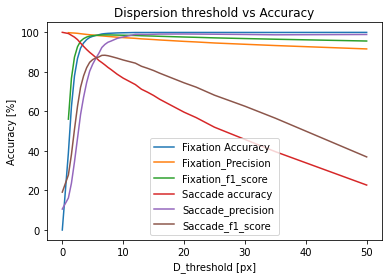

In [ ]:
plt.plot(thresholds, fixation_recall, label="Fixation Accuracy")
plt.plot(thresholds, fixation_precision, label="Fixation_Precision")
plt.plot(thresholds, fixation_f1_score, label="Fixation_f1_score")
plt.plot(thresholds, saccade_recall, label="Saccade accuracy")
plt.plot(thresholds, saccade_precision, label="Saccade_precision")
plt.plot(thresholds, saccade_f1_score, label="Saccade_f1_score")



#plt.plot(thresholds, accuracy, label="Acuracy")
plt.xlabel("D_threshold [px]")
plt.ylabel("Accuracy [%]")
plt.title("Dispersion threshold vs Accuracy")
plt.legend()
plt.show()

In [ ]:
print('fixation recall=',fixation_recall)
print('saccade accuracy=', saccade_recall)

fixation recall= [0.0, 38.9951441878902, 62.33277177683084, 77.95064909325141, 86.80011891784758, 92.01268457040928, 94.62887721732237, 96.31354672480428, 97.39371717371915, 97.98830641165395, 98.4243385194728, 98.79100188286591, 99.16757506689129, 99.35586165890398, 99.48468932712318, 99.55405807154891, 99.7027053810326, 99.78198394609058, 99.91081161430978, 99.91081161430978, 99.91081161430978, 99.92072143494202, 99.93063125557427, 99.94054107620651, 99.94054107620651, 99.94054107620651, 99.94054107620651, 99.94054107620651, 99.97027053810326]
saccade accuracy= [100.0, 99.41471571906355, 98.49498327759197, 97.5752508361204, 96.32107023411372, 94.56521739130434, 92.89297658862876, 91.30434782608695, 89.88294314381271, 88.62876254180603, 87.29096989966555, 85.78595317725753, 84.6989966555184, 83.52842809364549, 82.27424749163879, 81.18729096989966, 78.84615384615384, 76.83946488294315, 73.57859531772576, 71.23745819397993, 69.7324414715719, 68.06020066889631, 66.1371237458194, 59.61538